# 範例重點
學會從 Keras 內建函式取得資料  
能夠建立簡易的深度學習模型  
觀察並了解 Overfit 現象

In [8]:
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
# 建立一個有三層隱藏層之神經網路
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [5]:
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0824 15:03:59.065100  7820 deprecation_wrapper.py:119] From C:\Coding\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0824 15:03:59.105267  7820 deprecation_wrapper.py:119] From C:\Coding\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0824 15:03:59.113283  7820 deprecation_wrapper.py:119] From C:\Coding\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0824 15:03:59.192752  7820 deprecation_wrapper.py:119] From C:\Coding\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0824 15:03:59.20078

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 訓練模型並檢視驗證集的結果
model.fit(x_train, y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0824 15:04:16.285082  7820 deprecation.py:323] From C:\Coding\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0824 15:04:16.337031  7820 deprecation_wrapper.py:119] From C:\Coding\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 13s 259us/step - loss: 1.9457 - acc: 0.2969 - val_loss: 1.7758 - val_acc: 0.3654
Epoch 2/100
50000/50000 [==============================] - 6s 130us/step - loss: 1.7173 - acc: 0.3858 - val_loss: 1.6479 - val_acc: 0.4113
Epoch 3/100
50000/50000 [==============================] - 6s 127us/step - loss: 1.6128 - acc: 0.4244 - val_loss: 1.6194 - val_acc: 0.4269
Epoch 4/100
50000/50000 [==============================] - 6s 128us/step - loss: 1.5538 - acc: 0.4451 - val_loss: 1.5572 - val_acc: 0.4437
Epoch 5/100
50000/50000 [==============================] - 6s 126us/step - loss: 1.5011 - acc: 0.4660 - val_loss: 1.5223 - val_acc: 0.4566
Epoch 6/100
50000/50000 [==============================] - 6s 126us/step - loss: 1.4656 - acc: 0.4779 - val_loss: 1.4814 - val_acc: 0.4717
Epoch 7/100
50000/50000 [==============================] - 6s 125us/step - loss: 1.4319 - acc: 0.4885 - val_loss: 1

50000/50000 [==============================] - 6s 126us/step - loss: 0.5326 - acc: 0.8085 - val_loss: 1.9595 - val_acc: 0.5182
Epoch 60/100
50000/50000 [==============================] - 6s 126us/step - loss: 0.5261 - acc: 0.8119 - val_loss: 2.0871 - val_acc: 0.5186
Epoch 61/100
50000/50000 [==============================] - 6s 126us/step - loss: 0.5160 - acc: 0.8152 - val_loss: 2.0077 - val_acc: 0.5182
Epoch 62/100
50000/50000 [==============================] - 6s 125us/step - loss: 0.5065 - acc: 0.8191 - val_loss: 2.0331 - val_acc: 0.5167
Epoch 63/100
50000/50000 [==============================] - 6s 125us/step - loss: 0.5028 - acc: 0.8170 - val_loss: 2.0664 - val_acc: 0.5147
Epoch 64/100
50000/50000 [==============================] - 6s 125us/step - loss: 0.4882 - acc: 0.8267 - val_loss: 2.2244 - val_acc: 0.5020
Epoch 65/100
50000/50000 [==============================] - 6s 125us/step - loss: 0.4766 - acc: 0.8292 - val_loss: 2.1456 - val_acc: 0.5124
Epoch 66/100
50000/50000 [=======

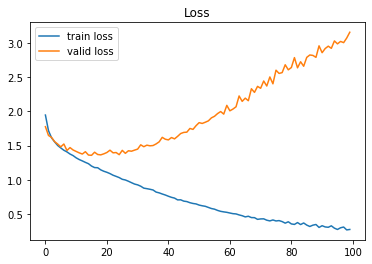

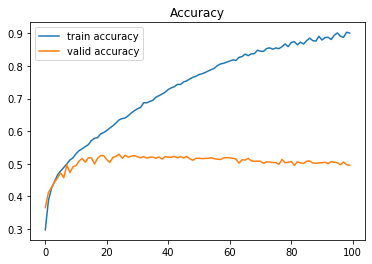

In [9]:
# 以視覺畫方式檢視訓練過程
import matplotlib.pyplot as plt
%matplotlib inline

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()